# Match between Rolex clusters and MC influential nodes and PageRank

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
from src.load_and_save import * 

In [2]:
# paths 
feature_extractions_path = "data/feature_extractions.csv"
celf_path = 'data/100_spreaders_celf.txt'
pagerank_path = 'data/100_spreaders_pagerank.txt'

## Load nodes from clusters, CELF, and PageRank

In [3]:
# Load cluster nodes
feature_extraction_df = pd.read_csv(feature_extractions_path)
feature_extraction_df.rename(columns={feature_extraction_df.columns[0]: 'node'}, inplace = True)
cluster_df = feature_extraction_df.copy()[['node','cluster']]
cluster_df

,node,cluster
0,2,role_1
1,3,role_1
2,4,role_1
3,5,role_1
4,6,role_3
...,...,...
16494,444546,role_6
16495,446560,role_6
16496,449779,role_6
16497,456041,role_6


In [4]:
# Generated from 02_influential_users: k = 100
celf_top_k_nodes = load_list(celf_path)

In [5]:
# Generated from 02_influential_users: k = 100
pagerank_top_k_nodes = load_list(pagerank_path)

## CELF vs PageRank match

In [6]:
# Calculating overlapping precentage
print("Overlapping percentage between CELF and PageRanke: ", 
      len(set(celf_top_k_nodes) & set(pagerank_top_k_nodes))/len(celf_top_k_nodes)*100,"%")

Overlapping percentage between CELF and PageRanke:  62.0 %


## Cluster sizes

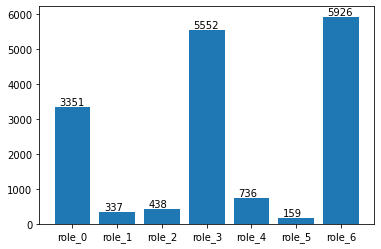

In [7]:
# Counting nodes in each cluster
roles_count = {}
list_roles = list(cluster_df['cluster'])
clusters, counts = np.unique(list_roles, return_counts=True)
for cluster, count in zip(clusters, counts):
    roles_count[cluster] = count

# visualisiong
clusters, counts = zip(*roles_count.items())
plt.bar(clusters, counts)
for i, v in enumerate(counts):
    plt.text(i-0.3, v+50, str(v))
plt.show()

## Calculating the fractions

In [8]:
# Nodes from MC and pagerank
celf_nodes = celf_top_k_nodes.copy()
pagerank_nodes = pagerank_top_k_nodes.copy()

# Nodes Rolex clusters
role_0 = list(cluster_df[cluster_df['cluster'] == 'role_0']['node'])
role_1 = list(cluster_df[cluster_df['cluster'] == 'role_1']['node'])
role_2 = list(cluster_df[cluster_df['cluster'] == 'role_2']['node'])
role_3 = list(cluster_df[cluster_df['cluster'] == 'role_3']['node'])
role_4 = list(cluster_df[cluster_df['cluster'] == 'role_4']['node'])
role_5 = list(cluster_df[cluster_df['cluster'] == 'role_5']['node'])
role_6 = list(cluster_df[cluster_df['cluster'] == 'role_6']['node'])
role_7 = list(cluster_df[cluster_df['cluster'] == 'role_7']['node'])

# List of Rolex clusters 
clusters = [role_0, role_1, role_2, role_3, role_4, role_5, role_6, role_7]

In [11]:
# Dictionary to save clusters fraction of match to MC and PageRank
cluster_match = {}

# Count fraction of nodes same for CELF and PageRank for each cluster 
for i, cluster in enumerate(clusters):
    CELF_fraction_same = len(set(celf_nodes) & set(cluster))/len(celf_nodes)
    PageRank_fraction_same = len(set(pagerank_nodes) & set(cluster))/len(pagerank_nodes)
    cluster_match[i+1] = [1,CELF_fraction_same, PageRank_fraction_same]

In [12]:
cluster_match_df = pd.DataFrame.from_dict(cluster_match)
#cluster_match_df = pd.DataFrame.from_dict(cluster_match, orient = 'index')
cluster_match_df

,1,2,3,4,5,6,7,8
0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0
1,0.20,0.12,0.01,0.46,0.0,0.10,0.11,0.0
2,0.12,0.15,0.01,0.54,0.0,0.09,0.09,0.0


## Visualization

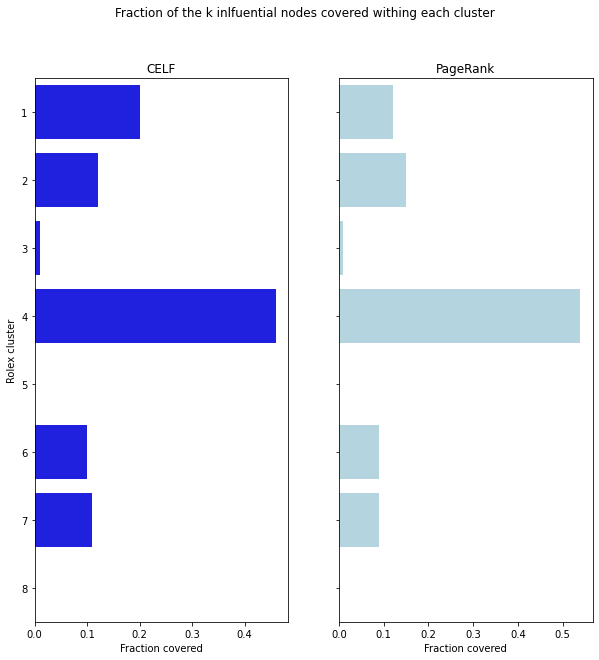

In [13]:
MC = pd.DataFrame(cluster_match_df.iloc[1]).T
PageRank = pd.DataFrame(cluster_match_df.iloc[2]).T

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
fig.suptitle('Fraction of the k inlfuential nodes covered withing each cluster')

# MC 
bar2 = sns.barplot(ax=axes[0], data=MC, color='blue', orient = "h")
axes[0].set_title("CELF")

# PageRank
#bar1 = sns.barplot(ax=axes[1], data=total, color='darkblue')
bar2 = sns.barplot(ax=axes[1], data=PageRank, color='lightblue', orient = "h")
axes[1].set_title("PageRank")


axes[0].set(ylabel='Rolex cluster', xlabel='Fraction covered')
axes[1].set(xlabel='Fraction covered')

# show the graph
plt.show()

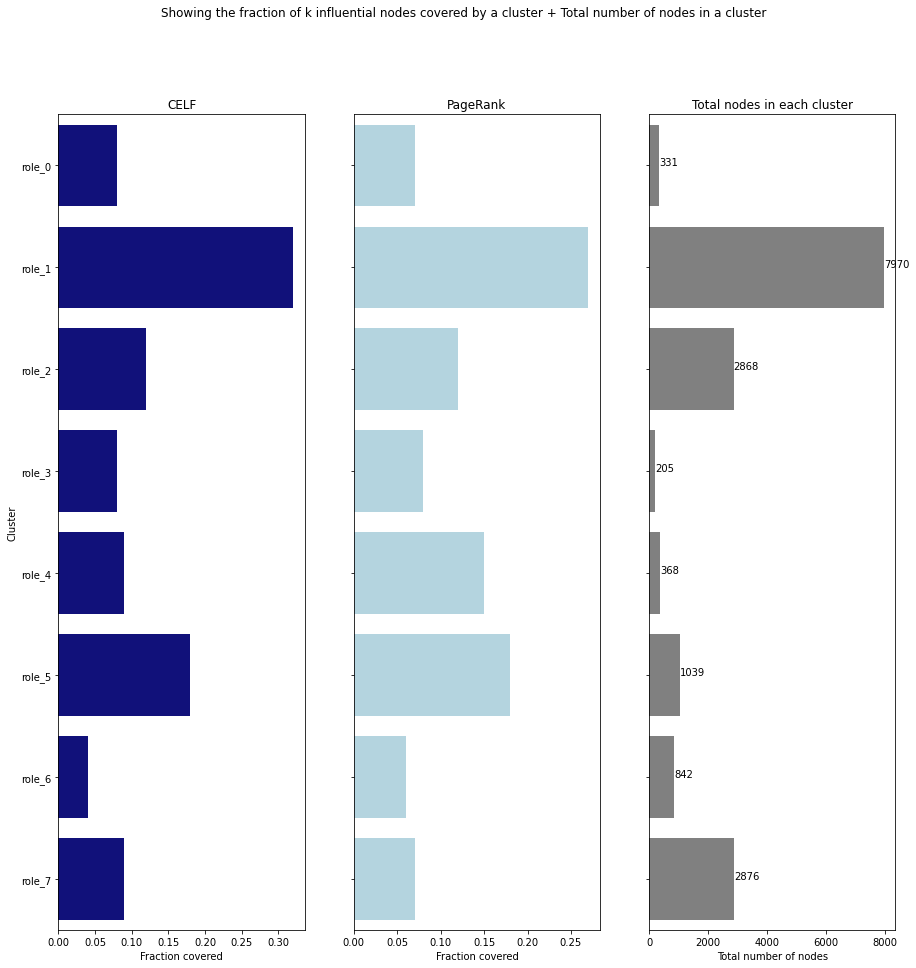

In [68]:
total = pd.DataFrame(cluster_match_df.iloc[0]).T
MC = pd.DataFrame(cluster_match_df.iloc[1]).T
PageRank = pd.DataFrame(cluster_match_df.iloc[2]).T

fig, axes = plt.subplots(1, 3, figsize=(15, 15), sharey=True)
fig.suptitle('Showing the fraction of k influential nodes covered by a cluster + Total number of nodes in a cluster')

# Plotting CELF
bar1 = sns.barplot(ax=axes[0], data=MC, color='darkblue', orient = "h")
axes[0].set_title("CELF")

# Plotting PageRank
bar2 = sns.barplot(ax=axes[1], data=PageRank, color='lightblue', orient = "h")
axes[1].set_title("PageRank")

# Plotting Total nr of nodes

# Counting nodes in each cluster
roles_count = {}
list_roles = list(cluster_df['cluster'])
clusters, counts = np.unique(list_roles, return_counts=True)
for cluster, count in zip(clusters, counts):
    roles_count[cluster] = count

bar3 = sns.barplot(y = clusters, x = counts, ax=axes[2], color='grey', orient = "h")
axes[2].set_title("Total nodes in each cluster")
# Adding total numbers 
for i, v in enumerate(counts):
    plt.text(v, i, str(v))

axes[0].set(ylabel='Cluster', xlabel='Fraction covered')
axes[1].set(xlabel='Fraction covered')
axes[2].set(xlabel='Total number of nodes')

plt.show()

## Only for the intersection...

In [78]:
# get the intersection between CELF and PageRank
common_nodes = list(set(celf_top_k_nodes) & set(pagerank_top_k_nodes))

In [86]:
# Nodes Rolex clusters
role_0 = list(cluster_df[cluster_df['cluster'] == 'role_0']['node'])
role_1 = list(cluster_df[cluster_df['cluster'] == 'role_1']['node'])
role_2 = list(cluster_df[cluster_df['cluster'] == 'role_2']['node'])
role_3 = list(cluster_df[cluster_df['cluster'] == 'role_3']['node'])
role_4 = list(cluster_df[cluster_df['cluster'] == 'role_4']['node'])
role_5 = list(cluster_df[cluster_df['cluster'] == 'role_5']['node'])
role_6 = list(cluster_df[cluster_df['cluster'] == 'role_6']['node'])
role_7 = list(cluster_df[cluster_df['cluster'] == 'role_7']['node'])

# List of Rolex clusters 
clusters = [role_0, role_1, role_2, role_3, role_4, role_5, role_6, role_7]

In [90]:
# Dictionary to save clusters fraction of match to MC and PageRank
cluster_match = {}

# Count fraction of nodes same for CELF and PageRank for each cluster 
for i, cluster in enumerate(clusters):
    common_same = len(set(common_nodes) & set(cluster))/len(common_nodes)
    cluster_match[i] = [common_same]

In [91]:
cluster_match_df = pd.DataFrame.from_dict(cluster_match)
cluster_match_df

,0,1,2,3,4,5,6,7
0,0.080645,0.290323,0.129032,0.096774,0.129032,0.16129,0.032258,0.080645


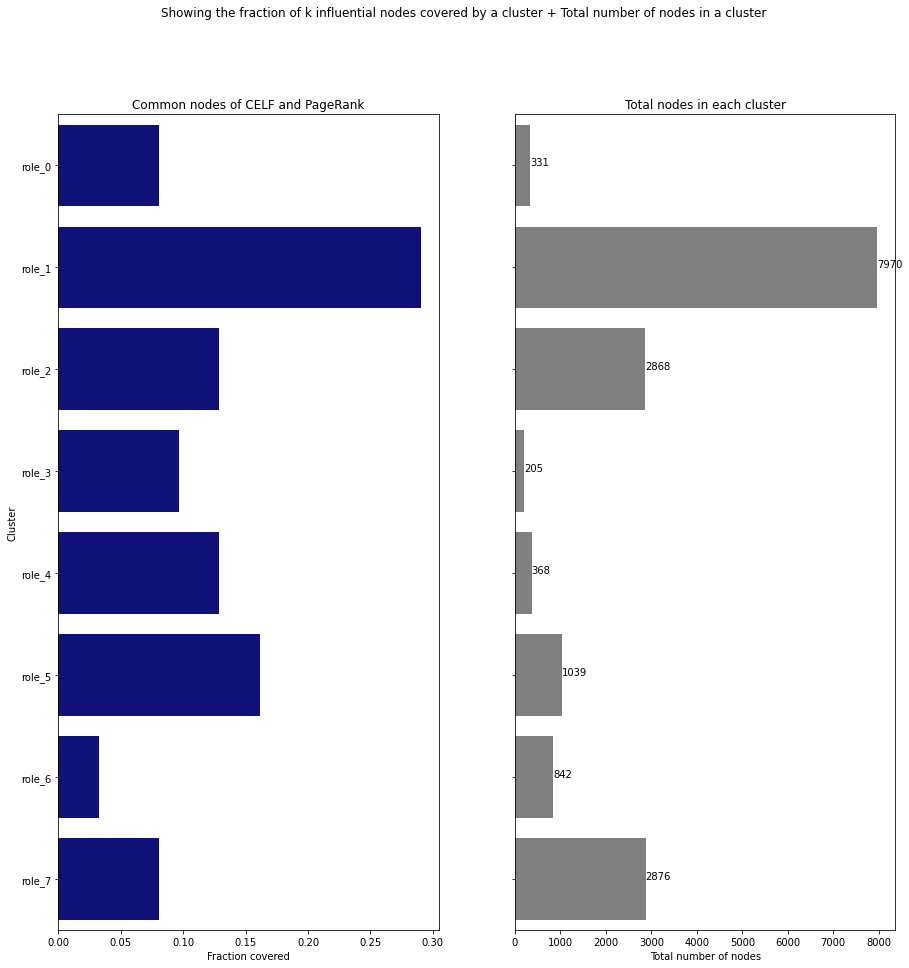

In [93]:
common_nodes = pd.DataFrame(cluster_match_df.iloc[0]).T

fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Showing the fraction of k influential nodes covered by a cluster + Total number of nodes in a cluster')

# Plotting common nodes
bar1 = sns.barplot(ax=axes[0], data=common_nodes, color='darkblue', orient = "h")
axes[0].set_title("Common nodes of CELF and PageRank")

# Plotting Total nr of nodes

# Counting nodes in each cluster
roles_count = {}
list_roles = list(cluster_df['cluster'])
clusters, counts = np.unique(list_roles, return_counts=True)
for cluster, count in zip(clusters, counts):
    roles_count[cluster] = count

bar3 = sns.barplot(y = clusters, x = counts, ax=axes[1], color='grey', orient = "h")
axes[1].set_title("Total nodes in each cluster")
# Adding total numbers 
for i, v in enumerate(counts):
    plt.text(v, i, str(v))

axes[0].set(ylabel='Cluster', xlabel='Fraction covered')
axes[1].set(xlabel='Total number of nodes')

plt.show()

# Find common features

## Load RoleX features 

In [155]:
# Load cluster nodes
feature_extraction_df = pd.read_csv(feature_extractions_path)
feature_extraction_df.rename(columns={feature_extraction_df.columns[0]: 'node'}, inplace = True)
feature_extraction_df

,node,in_degree(mean)(mean)(mean)(mean)(mean)(mean),in_degree(mean)(mean)(mean)(mean)(mean),external_edges(mean)(mean)(mean)(mean),in_degree(mean)(mean)(mean)(mean),in_degree(sum)(mean)(mean)(mean),external_edges(mean)(mean)(mean),external_edges(sum)(mean)(mean),in_degree(mean)(mean)(mean),in_degree(sum)(mean)(mean),...,out_degree(mean),total_degree(mean),total_degree(sum),external_edges,in_degree,internal_edges,out_degree,total_degree,Betweeness Centrality,cluster
0,2,378.806888,386.939511,3946.214369,398.161717,24233.771668,3841.426413,297102.043671,421.710482,25385.205366,...,66.350877,660.877193,37670.0,3149,654,690,57,711,2.271158e+05,role_3
1,3,379.050907,383.313239,3984.477170,391.563404,23576.126641,3869.961766,262825.819781,392.751203,21392.758349,...,56.000000,488.388889,8791.0,902,41,124,18,59,1.028602e+05,role_3
2,4,377.329381,379.375909,4233.439899,381.143598,24401.884456,4252.216193,344096.564927,382.548051,24458.767015,...,65.603922,373.635294,95277.0,11852,1494,5132,255,1749,3.156500e+06,role_3
3,5,384.391760,389.687407,4439.565723,396.509063,26853.931382,4557.419059,421048.376910,407.883068,29373.616713,...,80.047619,653.285714,27438.0,2914,445,490,42,487,1.841585e+04,role_7
4,6,384.197811,386.219248,4319.218987,386.600495,25061.801511,4374.431622,362984.602354,391.524500,25824.583046,...,90.132075,524.622642,27805.0,4298,2256,532,53,2309,1.223231e+04,role_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16494,444546,222.692949,196.722668,1957.281913,165.964317,8506.772603,1761.431556,100632.312500,120.911233,7017.925000,...,80.000000,305.000000,305.0,80,0,1,1,1,1.274079e+02,role_2
16495,446560,436.585144,458.978599,4930.984043,497.973987,30389.125819,4765.589368,334776.867479,559.365943,29412.638908,...,29.000000,1108.500000,6651.0,167,0,13,6,6,1.694695e+03,role_1
16496,449779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,5.0,0,0,1,1,1,1.029845e+01,role_0
16497,456041,379.617720,399.456244,5694.731442,434.618310,27990.319065,5555.092541,450854.313589,533.870885,24679.291812,...,48.000000,1466.500000,2933.0,94,0,4,2,2,7.775289e+01,role_1


In [156]:
feature_extraction_df.columns

Index(['node', 'in_degree(mean)(mean)(mean)(mean)(mean)(mean)',
       'in_degree(mean)(mean)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)(mean)',
       'in_degree(mean)(mean)(mean)(mean)', 'in_degree(sum)(mean)(mean)(mean)',
       'external_edges(mean)(mean)(mean)', 'external_edges(sum)(mean)(mean)',
       'in_degree(mean)(mean)(mean)', 'in_degree(sum)(mean)(mean)',
       'total_degree(sum)(mean)(mean)', 'external_edges(mean)(mean)',
       'external_edges(sum)(mean)', 'in_degree(mean)(mean)',
       'in_degree(sum)(mean)', 'internal_edges(mean)(mean)',
       'internal_edges(sum)(mean)', 'out_degree(mean)(mean)',
       'total_degree(sum)(mean)', 'external_edges(mean)',
       'external_edges(sum)', 'in_degree(mean)', 'in_degree(sum)',
       'internal_edges(mean)', 'internal_edges(sum)', 'out_degree(mean)',
       'total_degree(mean)', 'total_degree(sum)', 'external_edges',
       'in_degree', 'internal_edges', 'out_degree', 'total_degree',
       'Betweeness Cen

In [157]:
# Extracting the most interesting variables 
interesting_var = ['node', 'external_edges', 'in_degree', 'internal_edges', 'out_degree', 'total_degree', 'Betweeness Centrality', 'cluster']

In [158]:
feature_extraction_df = feature_extraction_df[interesting_var]
feature_extraction_df

,node,external_edges,in_degree,internal_edges,out_degree,total_degree,Betweeness Centrality,cluster
0,2,3149,654,690,57,711,2.271158e+05,role_3
1,3,902,41,124,18,59,1.028602e+05,role_3
2,4,11852,1494,5132,255,1749,3.156500e+06,role_3
3,5,2914,445,490,42,487,1.841585e+04,role_7
4,6,4298,2256,532,53,2309,1.223231e+04,role_2
...,...,...,...,...,...,...,...,...
16494,444546,80,0,1,1,1,1.274079e+02,role_2
16495,446560,167,0,13,6,6,1.694695e+03,role_1
16496,449779,0,0,1,1,1,1.029845e+01,role_0
16497,456041,94,0,4,2,2,7.775289e+01,role_1


## Filtered DF for CELF and PageRank

In [159]:
celf_nodes = celf_top_k_nodes.copy()
pagerank_nodes = pagerank_top_k_nodes.copy()
common_nodes = common_nodes.copy()

In [160]:
# getting all nodes without common nodes
a = set(list(feature_extraction_df['node']))
b = set(common_nodes)
all_excluding_common_nodes = a.difference(b)

In [113]:
celf_features = feature_extraction_df[feature_extraction_df.node.isin(celf_nodes)]

In [114]:
pagerank_features = feature_extraction_df[feature_extraction_df.node.isin(pagerank_nodes)]

In [115]:
common_nodes_features = feature_extraction_df[feature_extraction_df.node.isin(common_nodes)]

In [161]:
all_excluding_common_nodes_features = feature_extraction_df[feature_extraction_df.node.isin(all_excluding_common_nodes)]

In [162]:
# drop node column
feature_extraction_df = feature_extraction_df.drop(['node'], axis=1)
feature_extraction_df

,external_edges,in_degree,internal_edges,out_degree,total_degree,Betweeness Centrality,cluster
0,3149,654,690,57,711,2.271158e+05,role_3
1,902,41,124,18,59,1.028602e+05,role_3
2,11852,1494,5132,255,1749,3.156500e+06,role_3
3,2914,445,490,42,487,1.841585e+04,role_7
4,4298,2256,532,53,2309,1.223231e+04,role_2
...,...,...,...,...,...,...,...
16494,80,0,1,1,1,1.274079e+02,role_2
16495,167,0,13,6,6,1.694695e+03,role_1
16496,0,0,1,1,1,1.029845e+01,role_0
16497,94,0,4,2,2,7.775289e+01,role_1


## Visualization

In [139]:
features = ['Betweeness Centrality',
 'total_degree',
 'in_degree',
 'internal_edges',
 'out_degree',
 'external_edges',]

### Boxplot 

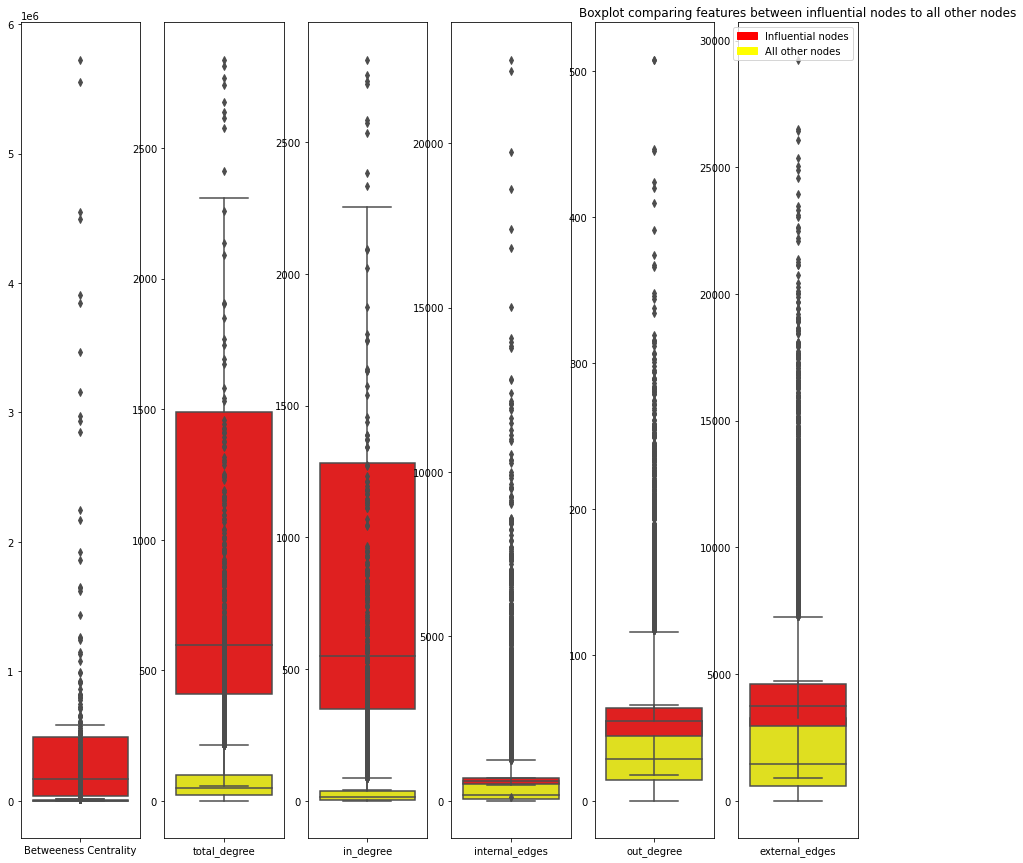

In [164]:
# creating boxplot
fig, ax = plt.subplots(1, 6, figsize=(15, 15))

for var, subplot in zip(features, ax.flatten()):
    sns.boxplot(data=pd.DataFrame(all_excluding_common_nodes_features[var]), ax=subplot, color = "yellow")
    sns.boxplot(data=pd.DataFrame(common_nodes_features[var]),  ax=subplot, color = "red")

plt.title("Boxplot comparing features between influential nodes to all other nodes") 
red_patch = mpatches.Patch(color='red', label='Influential nodes')
yellow_patch = mpatches.Patch(color='yellow', label='All other nodes')
plt.legend(handles=[red_patch, yellow_patch])


plt.show()

### Histogram

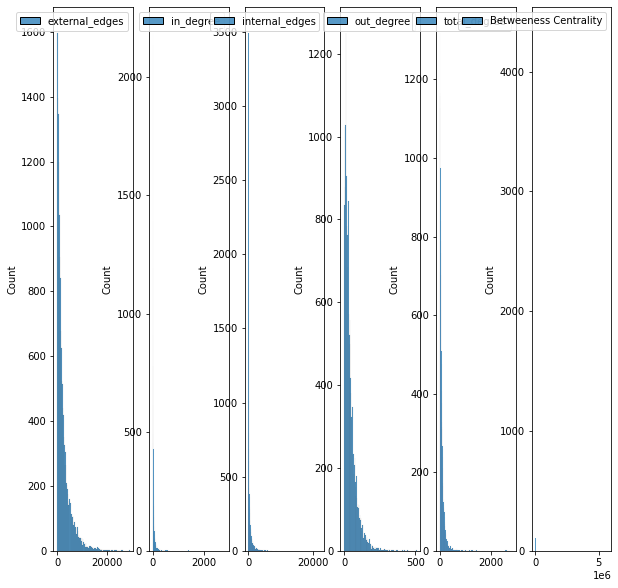

In [169]:
fig, ax = plt.subplots(1, 6, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.histplot(data=pd.DataFrame(all_excluding_common_nodes_features[var]), ax=subplot)
    sns.histplot(data=pd.DataFrame(common_nodes_features[var]), ax=subplot)

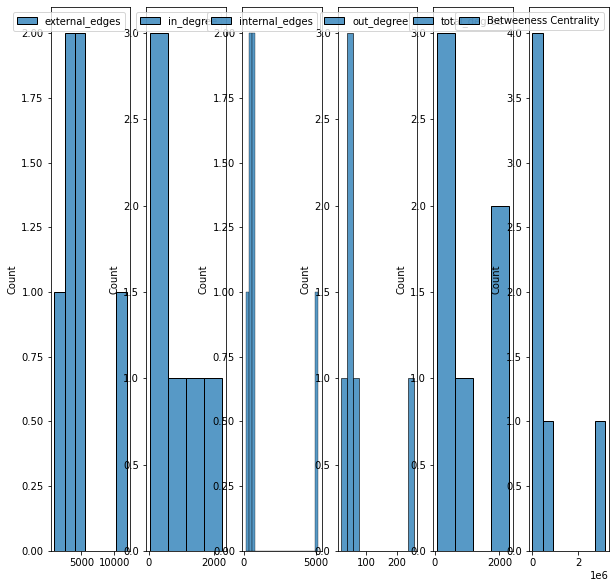

In [170]:
fig, ax = plt.subplots(1, 6, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.histplot(data=pd.DataFrame(common_nodes_features[var]), ax=subplot)

### Violinplot

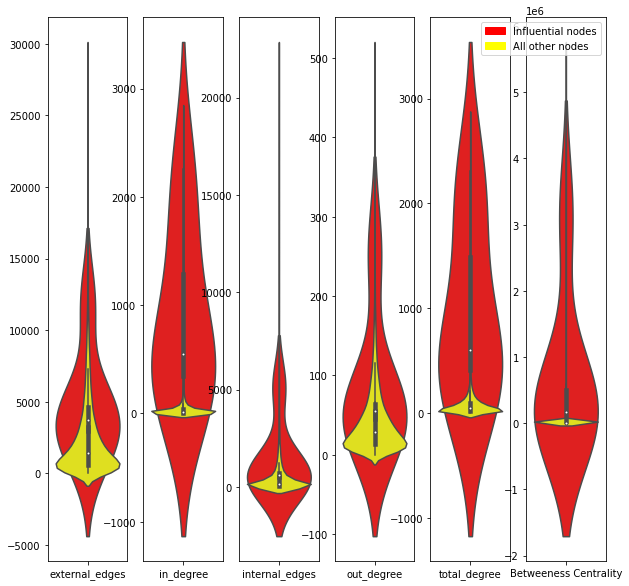

In [176]:
fig, ax = plt.subplots(1, 6, figsize=(10, 10))
for var, subplot in zip(features, ax.flatten()):
    sns.violinplot(data=pd.DataFrame(common_nodes_features[var]),  ax=subplot, color = "red")
    sns.violinplot(data=pd.DataFrame(all_excluding_common_nodes_features[var]), ax=subplot, color = "yellow")
    
red_patch = mpatches.Patch(color='red', label='Influential nodes')
yellow_patch = mpatches.Patch(color='yellow', label='All other nodes')
plt.legend(handles=[red_patch, yellow_patch])

plt.show()

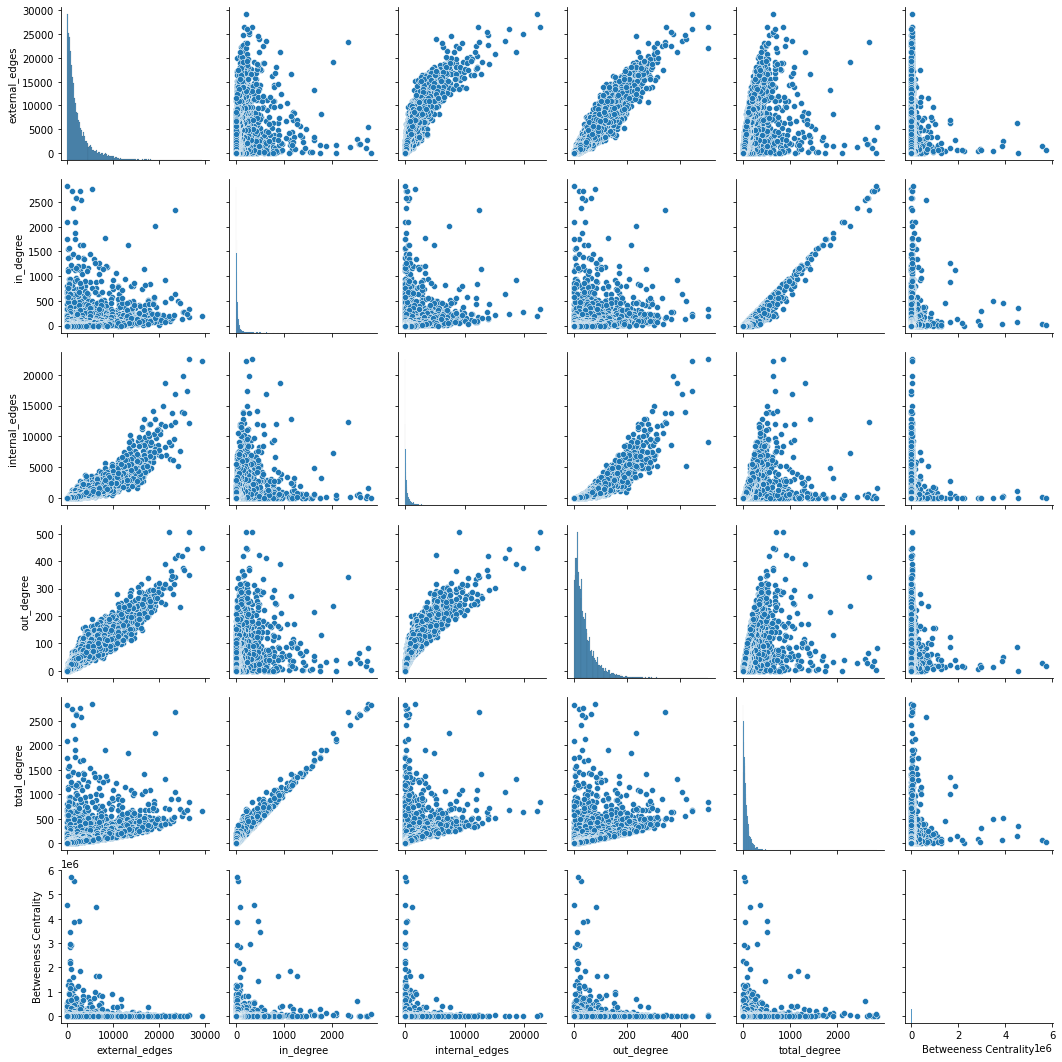

In [174]:
sns.pairplot(all_excluding_common_nodes_features[features])

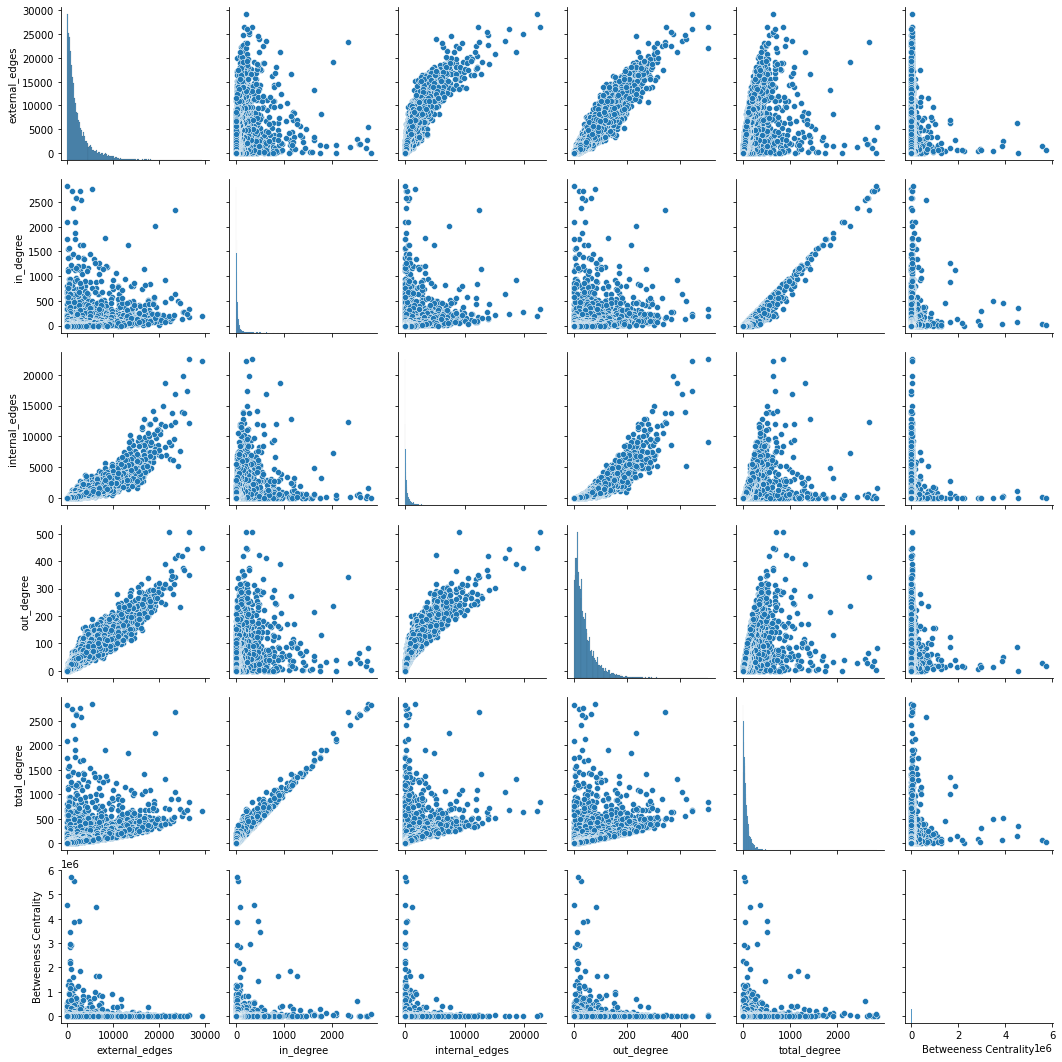

In [175]:
sns.pairplot(all_excluding_common_nodes_features[features])